# FashionMNIST Classifier in PyTorch

This notebook develops a convolutional neural network trained on the FashionMNIST Dataset to classify different categories of clothes.

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Dataset Class

The following code creates a dataset class, and also a ToTensor class, to convert the numpy arrays to torch tensors.

In [3]:
class FashionMNISTDataset(Dataset):
    def __init__(self, csv_file, transform = None):
        data = pd.read_csv(csv_file)
        print("DATA:")
        print(data.head())
        
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28).astype(float)
        self.Y = np.array(data.iloc[:, 0])

        del data;
        self.transform = transform
        
    def __len__(self):
        """ Returns the length of the dataset """
        return len(self.X)
    
    def __getitem__(self, idx):
        """ Enables indexing into the dataset with the [] operator"""
        item = self.X[idx]
        label = self.Y[idx]
        
        if self.transform:
            item = self.transform(item)
            
        return (item, label)
    
    
class ToTensor(object):
    """ Numpy to Torch Tensor"""
    def __call__(self, sample):
        sample = sample / 255
        return torch.from_numpy(sample)

In [4]:
#setting some learning hyperparameters

num_epochs = 10
learning_rate = 0.001
batch_size = 100

In [5]:
#load train dataset

train_dataset = FashionMNISTDataset(csv_file = 
                                    '/media/user/D:/Image Recognition QSTP/fashion-mnist_train.csv',
                                   transform = ToTensor())

DATA:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0        30        43   
3       0    ...            3         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0   

In [6]:
#load test dataset

test_dataset = FashionMNISTDataset(csv_file = 
                                    '/media/user/D:/Image Recognition QSTP/fashion-mnist_test.csv',
                                  transform = ToTensor())

DATA:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       8    ...          103        87        56         0         0   
1       0    ...           34         0         0         0         0   
2      99    ...            0         0         0         0        63   
3       0    ...          137       126       140         0       133   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0   

In [7]:
#make the datasets iterable

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)

# Visualizing the Data

Twenty random samples from the training dataset are plotted alongside their corresponding labels.

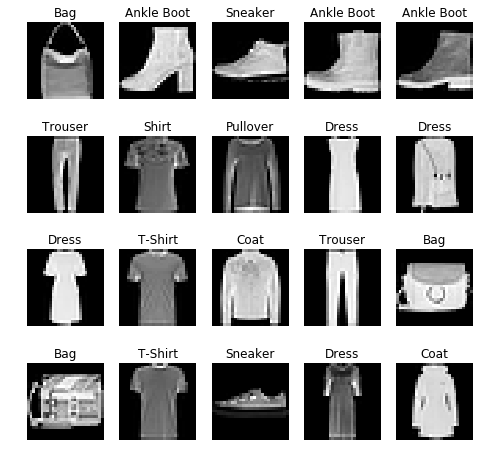

In [8]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

N = len(train_dataset)
fig = plt.figure(figsize = (8, 8))

for i in range(1, 21):
    img_index = np.random.randint(N)
    img = train_dataset[img_index][0][0, :, :]
    fig.add_subplot(4, 5, i)
    plt.title(labels_map[train_dataset[img_index][1]])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    
plt.show()

# Creating the Neural Network Class

The architecture used in the following convolutional neural network is:
CONV -> ReLU -> MAXPOOL -> CONV -> ReLU -> MAXPOOL -> FC -> FC

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.Dropout2d(p = 0.2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.Dropout2d(p = 0.2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Linear(7*7*32, 120),
            nn.Dropout(p = 0.4),
            nn.Linear(120, 10))
            
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.layer3(out)
        return out
            
model = CNN()
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Dropout2d(p=0.2)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Dropout2d(p=0.2)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=1568, out_features=120, bias=True)
    (1): Dropout(p=0.4)
    (2): Linear(in_features=120, out_features=10, bias=True)
  )
)


In [11]:
#parameter sizes, excluding bias

params = list(model.parameters())
print(len(params))
print(params[0].size())
print(params[4].size())
print(params[8].size())
print(params[10].size())

12
torch.Size([16, 1, 5, 5])
torch.Size([32, 16, 5, 5])
torch.Size([120, 1568])
torch.Size([10, 120])


In [12]:
#set the loss and optimizer class

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Train the model

Training the model for specified number of epochs and viewing test accuracies at intermediate stages.

In [15]:
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        
        images = Variable(images.float())
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
         
        if (i+1) % 100 == 0:
           print('Epoch : %d/%d, Iter : %d/%d, Loss: %.4f'
                %(epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data[0])) 
        
        if (i + 1) % 250 == 0:
            model.eval()
            
            correct = 0
            total = 0

            for images, labels in test_loader:
    
                images = Variable(images.float())
                outputs = model(images)
    
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (labels == predicted).sum()
    
            print('Test Accuracy of the model: %.4f %% at iteration %d' %(100 * correct / total, i + 1)) 

Epoch : 1/10, Iter : 100/600, Loss: 0.3278
Epoch : 1/10, Iter : 200/600, Loss: 0.3734
Test Accuracy of the model: 88.4900 % at iteration 250
Epoch : 1/10, Iter : 300/600, Loss: 0.3458
Epoch : 1/10, Iter : 400/600, Loss: 0.2087
Epoch : 1/10, Iter : 500/600, Loss: 0.5158
Test Accuracy of the model: 89.0000 % at iteration 500
Epoch : 1/10, Iter : 600/600, Loss: 0.2249
Epoch : 2/10, Iter : 100/600, Loss: 0.3801
Epoch : 2/10, Iter : 200/600, Loss: 0.4896
Test Accuracy of the model: 88.8600 % at iteration 250
Epoch : 2/10, Iter : 300/600, Loss: 0.2206
Epoch : 2/10, Iter : 400/600, Loss: 0.3864
Epoch : 2/10, Iter : 500/600, Loss: 0.3451
Test Accuracy of the model: 90.3800 % at iteration 500
Epoch : 2/10, Iter : 600/600, Loss: 0.3960
Epoch : 3/10, Iter : 100/600, Loss: 0.2773
Epoch : 3/10, Iter : 200/600, Loss: 0.2569
Test Accuracy of the model: 90.2200 % at iteration 250
Epoch : 3/10, Iter : 300/600, Loss: 0.3322
Epoch : 3/10, Iter : 400/600, Loss: 0.2557
Epoch : 3/10, Iter : 500/600, Loss: 0

# Evaluating the model

The trained model is finally evaluated on the test set to determine a final accuracy of 91.45%

In [16]:
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    
    images = Variable(images.float())
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (labels == predicted).sum()
    
print('Final Test Accuracy of the model: %.4f %%' %(100 * correct / total)) 

Final Test Accuracy of the model: 91.4500 %
